## Введение в анализ данных, ИАД-4

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а): _Щекотов Иван_

### Общая информация

__Дата выдачи:__ 08.02.2020

__Дедлайн:__ 18.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}}) + \min(2, s_{\text{matplotlib}})\right) \times 10 / 23,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. За каждую задачу сверх обязательных (9 в первой части, 12 во второй и 2 в третьей) дается 0.5 бонусных балла. Таким образом, за это домашнее задание можно получить 2 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

In [42]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [43]:
def result_mark(weights: np.array, marks: np.array) -> int:
    _res = np.sum(weights * marks)
    return int(round(_res))
    

In [44]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [45]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [46]:
def change_array(array: np.array, number: int) -> np.array:
    _change = array[::3]
    _change[:] = number
    return array

In [47]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [48]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [49]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    abs_vals = np.absolute(array1 - array2)
    _res = np.where(abs_vals < precision) 
    return _res[0]

In [50]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [51]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [52]:
def block_matrix(block: np.array) -> np.array:
    _res = np.block([[block, block], [block, block]])
    return _res

In [53]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [54]:
def diag_prod(matrix: np.array) -> int:
    diag_elem = np.diag(matrix)
    mask = diag_elem > 0
    _res = np.prod(diag_elem[mask])
    return _res

In [55]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [56]:
def normalize(matrix: np.array) -> np.array:
    col_means = np.mean(matrix, axis=0)
    col_std = np.std(matrix, axis=0)
    norm_matrix = (matrix - col_means) / col_std
    nan_mask = np.isnan(norm_matrix)
    norm_matrix[nan_mask] = 0 # when having zero std values, resulting nan are replaced with zero
    return norm_matrix

In [57]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [58]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [59]:
def antiderivative(coefs: np.array) -> np.array:
    poly = np.poly1d(coefs)
    anti_poly = poly.integ()
    return anti_poly.coef

In [60]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [61]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [62]:
def make_symmetric(matrix: np.array) -> np.array:
    iu = np.triu_indices(4, 1)
    matrix.T[iu] = matrix[iu]
    return matrix

In [63]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [64]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [65]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    new_matrix = np.tile(np.arange(a, b + 1), (m, 1))  
    return new_matrix

In [66]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [67]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [68]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    _cosine = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    return _cosine

In [69]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [70]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

Сформируем датафрейм

In [72]:
df = pd.read_csv("train.csv", delimiter=',')

In [73]:

df.shape



(891, 12)

Таблица имеет 891 строку (не включая самую верхнуюю с объявлением признаков) и 12 столбцов (признаки пассажиров)

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

PassengerId – порядковый
Survived – категориальный (может быть конвертирован в бинарный)
Pclass – порядковый
Name – категориальный
Sex – категориальный (может быть конвертирован в бинарный)
Age – вещественный
SibSp – вещественный 
Parch – вещественный
Ticket – категориальный
Fare – вещественный
Cabin – категориальный
Embarked – категориальный

Задача классификация: построть классификацию людей, кто имел большие шансы выжить.
Задача кластеризации: кластеризовать выживших и умерших по всем параметрам
Задача регресии: зависимость выживших от порта посадки

In [76]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [77]:
df["Survived"].sum() / df["Survived"].count()

0.3838383838383838

Также найти долю выживших пассажиров после крушения можно было найти воспользовавшись командой:

In [78]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


z Сгруппируем признаки по нужным признакам, посчитаем количество выживших мужчин и женщин и чтобы получить доли выживших мужчин и женщин поделим на общее количество выживших:

In [79]:
survived_sex = df.groupby(["Survived", "Sex"])["Survived"]
male_survived = survived_sex.get_group((1, 'male')).count() # number of male who survived
female_survived = survived_sex.get_group((1, 'female')).count() # number of female who survived
all_survived = male_survived + female_survived # total number of people who survived
male_fraction = male_survived / all_survived
female_fraction = female_survived / all_survived 
print("male: ", male_fraction, " female: ", female_fraction)


male:  0.31871345029239767  female:  0.6812865497076024


Как можно заметить, доля выживших женщин значительно больше доли выживших мужчин чуть больше чем в два раза.

### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [80]:
group_class = df.groupby("Pclass")
group_class.count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


Как можно заметить в первом классе ехало 216 пассажиров, во втором – 184, в третьем – 491.

In [81]:
group_class_mf = df.groupby(["Pclass", "Sex"])["Sex"]
group_class_mf.count()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Sex, dtype: int64

в самом многочисленном классе ехало 347 мужчин и 144 женщины.

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [82]:
fare_min = df["Fare"].min()
fare_mean = df["Fare"].mean()
fare_max = df["Fare"].max()
print("minimal fare: ", fare_min, "; mean fare: ",  fare_mean, "; maximum fare: ", fare_max)

#Southhampton
print("\nSouthhampton:\n")
fare_s_min = df[(df["Embarked"] == 0)]["Fare"].min() #instead of 0 should be 'S, but categorial "Embarked" modificated in task #24
fare_s_mean = df[(df["Embarked"] == 0)]["Fare"].mean()
fare_s_max = df[(df["Embarked"] == 0)]["Fare"].max()
print("minimal fare: ", fare_s_min, "; mean fare: ",  fare_s_mean, "; maximum fare: ", fare_s_max)


minimal fare:  0.0 ; mean fare:  32.2042079685746 ; maximum fare:  512.3292

Southhampton:

minimal fare:  nan ; mean fare:  nan ; maximum fare:  nan


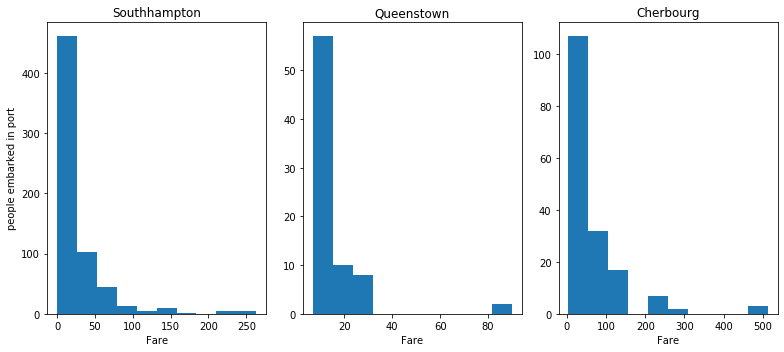

In [83]:
(fig, (S, Q, C)) = plt.subplots(1, 3, figsize=(11,5))
S.set_title("Southhampton")
C.set_title("Cherbourg")
Q.set_title("Queenstown")
S.set_xlabel("Fare")
C.set_xlabel("Fare")
Q.set_xlabel("Fare")
S.set_ylabel("people embarked in port")
S.hist(df[(df["Embarked"] == "S")]["Fare"])
C.hist(df[(df["Embarked"] == "C")]["Fare"])
Q.hist(df[(df["Embarked"] == "Q")]["Fare"])
plt.tight_layout()

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Признак 'PassengerId' не несет в себе никакой полезной информации, потому что присваивает кажому пассажиру индивидуальный номер. Также признак 'Cabin' не несет в себе никакой полезной информации, поскольку почти 80 процентов данных отсутствует и отсутствуют дополнительные признаки для анализа, например, расположение кают в соотвествии с их нумерацией. Тогда можно было бы проверить, например, зависела ли выживаемость от  расположения каюты на той или иной палубе. Также абсолютно нерелевантным для анализа является номера билета, поэтому его тоже можно удалить.

In [84]:
df.drop(["PassengerId", "Ticket", "Cabin"], axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [85]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [86]:
#filling missing ports
_embark = df.Embarked.dropna().mode()[0]
df['Embarked'] = df['Embarked'].fillna(_embark)

#-----------------------------------
#filling missing ages
df["Age"] = df["Age"].fillna(df.Age.mean())

#-----------------------------------
#filling missing cabins

df["Cabin"] = df["Cabin"].fillna(0)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [87]:
_corr = df["Age"].corr(df["Fare"])
print(_corr)

#диаграмма рассеяния построена в части 3

0.09156609328505758


### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [88]:
df[["Survived", "Fare"]].groupby(["Survived"], as_index=False).mean().sort_values(by="Survived", ascending=False)


,Survived,Fare
1,1,48.395408
0,0,22.117887


In [89]:
#чем выше класс, тем больше выживаемость
df[["Survived", "Pclass"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [90]:
#siblings & spouses + parents & children + passenger herself
df["SibSp & Parch"] = df["SibSp"] + df["Parch"] + 1
#feature is child?
df["Child"] = (df.Age < 18).astype(int)


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [91]:
#Как выживали люди в зависимости от количества родственников
df[["Survived", "SibSp & Parch"]].groupby(["SibSp & Parch"], as_index=False).mean().sort_values(by="SibSp & Parch", ascending=True)


,SibSp & Parch,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

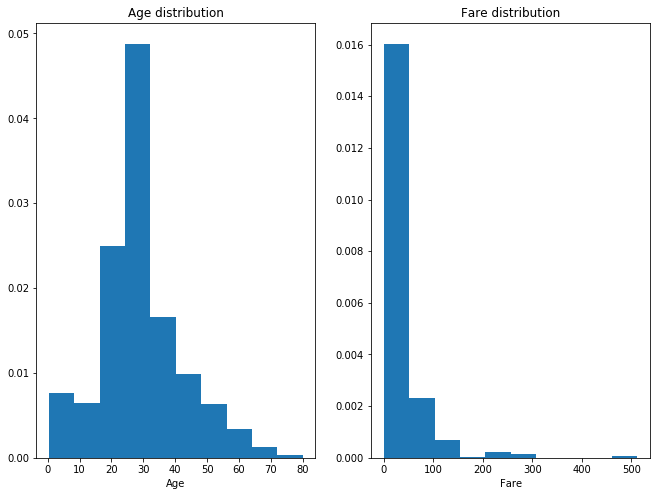

In [92]:
(fig, (f_age, f_fare)) = plt.subplots(1, 2, figsize=(11, 8))
f_age.set_title("Age distribution")
f_age.set_xlabel("Age")
f_fare.set_title("Fare distribution")
f_fare.set_xlabel("Fare")
f_age.hist(df.Age, normed=True)
f_fare.hist(df.Fare, normed=True)
plt.show()

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [93]:
#сначала скомпируем датафрейм в новый, чтобы не нарушать работу предыдущих клеток в буке
df_new = df.copy()
#потом переприсвоим значения
df_new["Embarked"] = df_new["Embarked"].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
df_new["Sex"] = df_new["Sex"].map({"male": 0, "female": 1}).astype(int)
df_new.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp & Parch,Child
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0


# Часть 3. Matplotlib

### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию `plt.subplots`. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots`. Также полезными могут оказаться параметры `bins`, `ec`, `density` функции `plt.hist`, а также функции `set_xlabel`, `set_ylabel`, `set_title` и `plt.tight_layout`.

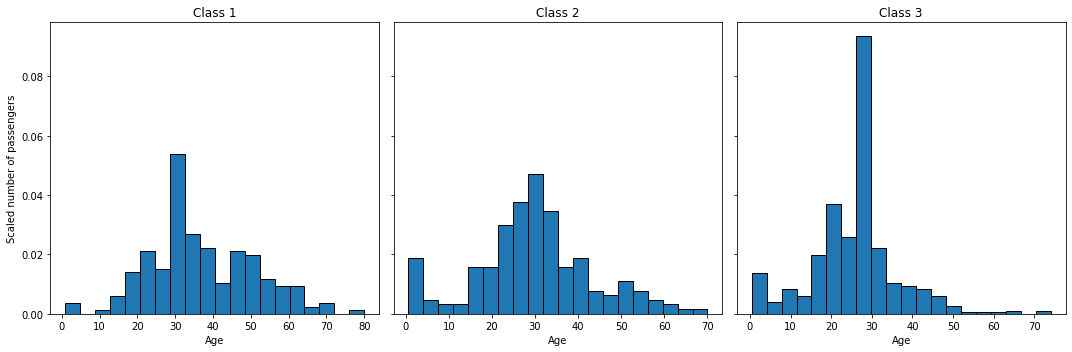

In [94]:
(fig, (class_1, class_2, class_3)) = plt.subplots(1, 3, sharey=True, figsize=[15, 5])
class_1.set_ylabel("Scaled number of passengers")
class_1.set_title("Class 1")
class_1.set_xlabel("Age")
class_2.set_xlabel("Age")
class_3.set_xlabel("Age")
class_2.set_title("Class 2")
class_3.set_title("Class 3")
class_1.hist(df[(df["Pclass"] == 1)]["Age"], bins=20, edgecolor="#000000", normed=True)
class_2.hist(df[(df["Pclass"] == 2)]["Age"], bins=20, edgecolor="#000000", normed=True)
class_3.hist(df[(df["Pclass"] == 3)]["Age"], bins=20, edgecolor="#000000", normed=True)
plt.tight_layout()


### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. Также пунктирной линией изобразите график синуса для `x` на том же промежутке. Укажите на графике легенду.

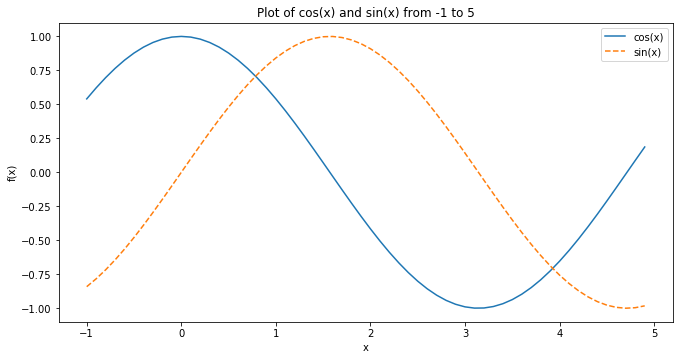

In [95]:
plt.figure(figsize=(11, 5.5))
x = np.arange(-1, 5, 0.1)
y1 = np.cos(x)
y2 = np.sin(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y1, label="cos(x)")
plt.plot(x, y2, "--", label="sin(x)")
plt.title("Plot of cos(x) and sin(x) from -1 to 5")
plt.legend()
plt.show()

### 27

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. Обозначьте выживших и погибших пассажиров разными цветами и маркерами. Также укажите на графике легенду.

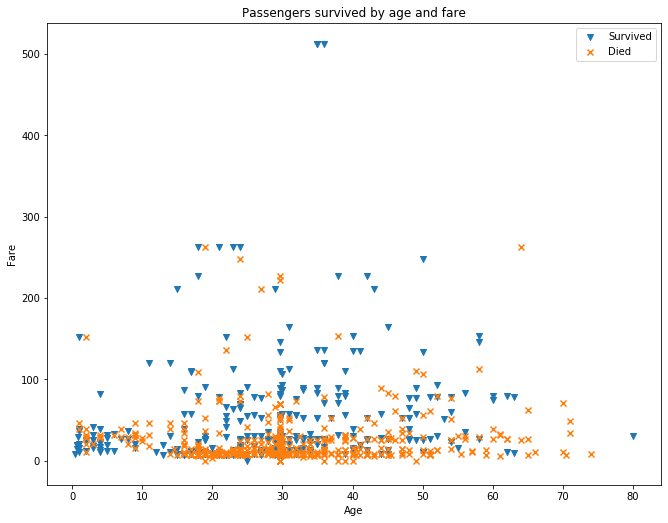

In [96]:
plt.figure(figsize=(11, 8.5))
plt.scatter(x=df[(df["Survived"] == 1)]["Age"], y=df[(df["Survived"] == 1)]["Fare"], marker="v", label="Survived")
plt.scatter(x=df[(df["Survived"] == 0)]["Age"], y=df[(df["Survived"] == 0)]["Fare"], marker="x", label="Died")
plt.title("Passengers survived by age and fare")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()
#col = df.Survived.map({0:"#ffa550", 1:"#0000ff"})
#plt.scatter(x=df.Age, y=df.Fare, c=col)